# Regresion Logistica con una Red Neuronal 

Bienvenidos al primer laboratorio, en el vamos a modelar una Regresion Logistica a travez de una red neurnal. Para ello, asumamos el siguiente problema: Dado un conjunto de datos :

$$\mathcal{D} = \{X, Y\} ~~~~~| ~~~x^{(i)} \in \mathcal{R}^{64\times64}~~~,~~~ y^{(i)} \in \{0, 1\}$$ 

Donde $x^{(i)}$ representa una imagen de 64 bits de alto y 64 bits de ancho e $y^{(i)}$ asume valor 1 si corresponde a una foto de un gato, y 0 en caso contrario.
Debemos estimar para una imagen con estas dimensiones, si esta corresponde a un gato o no.

Para comenzar debemos tener claro que tendremos a nuestra disposicion un conjunto de datos de entremaniento y un conjunto de datos de prueba, el de entrenamiento lo emplearemos para ajustar los parametros de la red nueronal de manera que alzance un nivel de generalizacion que permitan una vez terminado el entrenamiento, clasificar correctamente imagenes nuevas, es decir, las del conjunto de pueba.

Carguemos los datos, asi como las librerias necesarias en nuestro código:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
%matplotlib inline


train_dataset = h5py.File('dataset/train_catvnoncat.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set imagenes
train_set_y = np.array(train_dataset["train_set_y"][:]).reshape(train_set_x_orig.shape[0], 1) # train set etiquetas

test_dataset = h5py.File('dataset/test_catvnoncat.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set imagenes
test_set_y = np.array(test_dataset["test_set_y"][:]).reshape(test_set_x_orig.shape[0], 1) # test set etiquetas

In [2]:
print('Imagenes de prueba:', test_set_x_orig.shape)
print('Imagenes de entrenamiento:', train_set_x_orig.shape)
print('Etiquetas de entrenamiento:', train_set_y.shape)

Imagenes de prueba: (50, 64, 64, 3)
Imagenes de entrenamiento: (209, 64, 64, 3)
Etiquetas de entrenamiento: (209, 1)


Como pueden ver en la celda anterior, cada uno de los arreglos que contienenen las imagenes esta compuesto por una primera dimencion que representa la cantidad de ejemplos, en este caso de imagenes, las segundas y terceras son la cantidad de pixeles de ancho y largo (64x64), y finalmente la ultima la cantidad de canales que tiene la imagen, en este caso son 3 *RGB*.

Para las etiquetas simplemente tenemos por cada ejemplo un valor asociado que puede ser 0 o 1. 

Con el siguiente celda podemos visualizar una imagen del conjunto de datos de entrenamiento.

y = [1]


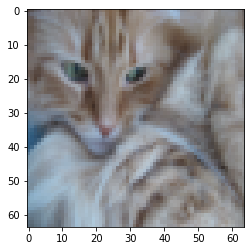

In [3]:

index = 2
plt.imshow(train_set_x_orig[index])
print (f"y = {train_set_y[index]}")



En la clase vimos que, para la neurona de nuestra red, su activación estaba dada como:
$$\hat{y} = \sigma{(W^{T}X + b)}$$

En esta expresion $X, W \in \mathcal{R}^{n}$. Sin embargo para nuestro problema, tenemos como entrada un objeto bidimensional, es decir $x^{(i)} \in \mathcal{R}^{64\times64}$, para solventar esta situacion, y adaptar los datos a nuestro modelo, emplearemos la funcion reshape asociada los arreglos numpy

```python
X_flatten = X.reshape(X.shape[0], -1)    
```
 
convirtiendo nuestra imagen en un vector unidimensional donde cada componente representa un pixel de la imagen de manera que cada fila esta dispuesta una a continuacion de la otra.

In [4]:
### PROGRAME SU CODIGO AQUI ####

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1)
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1)

### FIN DE SU CODIGO ####

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (209, 12288)
train_set_y shape: (209, 1)
test_set_x_flatten shape: (50, 12288)
test_set_y shape: (50, 1)


**Salida Esperada**: 

<table style="width:35%">
  <tr>
    <td>train_set_x_flatten shape</td>
    <td> (209, 12288)</td> 
  </tr>
  <tr>
    <td>train_set_y shape</td>
    <td>(209, 1)</td> 
  </tr>
  <tr>
    <td>test_set_x_flatten shape</td>
    <td>(50, 12288)</td> 
  </tr>
  <tr>
    <td>test_set_y shape</td>
    <td>(50, 1)</td> 
  </tr>
</table>

Para representar imágenes en color, hay que especificar los canales rojo, verde y azul (RGB) para cada píxel, por lo que el valor del píxel es en realidad un vector de tres números que van de 0 a 255.

Un paso común de preprocesamiento en el aprendizaje automático es centrar y estandarizar tu conjunto de datos, lo que significa que restas la media de todo el arreglo cada ejemplo, y luego divides cada ejemplo por la desviación estándar. Pero para los conjuntos de datos de imágenes, es más simple y más conveniente y funciona casi igual de bien simplemente dividir cada fila del conjunto de datos por 255 (el valor máximo de un canal de píxeles).

In [5]:
### PROGRAME AQUI ###
train_set_x_flatten = train_set_x_flatten/255.0
test_set_x_flatten = test_set_x_flatten/255.0
### FIN DE SU CODIGO ###
print(train_set_x_flatten)
print(test_set_x_flatten)

[[0.06666667 0.12156863 0.21960784 ... 0.         0.         0.        ]
 [0.76862745 0.75294118 0.74509804 ... 0.32156863 0.31372549 0.31764706]
 [0.32156863 0.27843137 0.26666667 ... 0.54117647 0.55294118 0.55686275]
 ...
 [0.56078431 0.60784314 0.64705882 ... 0.33333333 0.41960784 0.58431373]
 [0.08627451 0.09411765 0.09019608 ... 0.01568627 0.01960784 0.        ]
 [0.03137255 0.10980392 0.20784314 ... 0.         0.         0.        ]]
[[0.61960784 0.40784314 0.3254902  ... 0.67843137 0.50196078 0.43137255]
 [0.45098039 0.43137255 0.43529412 ... 0.67058824 0.69019608 0.72941176]
 [1.         0.99215686 0.99607843 ... 0.52156863 0.39607843 0.4745098 ]
 ...
 [0.16078431 0.18431373 0.32941176 ... 0.71764706 0.55294118 0.45490196]
 [0.07058824 0.07058824 0.0627451  ... 0.56470588 0.5372549  0.42352941]
 [0.52156863 0.63921569 0.29411765 ... 0.01960784 0.08627451 0.01960784]]



### Hasta el momento que deber recordar:

    
Los pasos habituales para el preprocesamiento de un nuevo conjunto de datos son:

- Averiguar las dimensiones y formas del problema (m_train, m_test, num_px, ...)
- Reformar los conjuntos de datos de manera que cada ejemplo sea ahora un vector de tamaño (1, num_px \* num_px \* 3)
- Estandarizar los datos

## Arquitectura General


Es hora de diseñar un algoritmo sencillo para distinguir las imágenes de gatos de las que no lo son..

**Expresiones matematicas que debes tener en cuenta**:

Para un ejemplo $x^{(i)}$, donde i representa el indice de dicho ejemplo:


$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$


El costo es calculado por la suma sobre el error o perdida de todos los ejemplos:

$$ C = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Aspectos Claves**:
    
En este ejercicio, realizarás los siguientes pasos: 

- Inicializar los parámetros del modelo.
- Aprender los parámetros del modelo minimizando el costo **C**.  
- Utilizar los parámetros aprendidos para hacer predicciones (en el conjunto de pruebas).
- Analizar los resultados y concluir


Los principales pasos para construir una red neuronal son:

1. Definir la estructura del modelo (como el número de características de entrada) 
2. Inicializar los parámetros del modelo
3. Bucle:
    - Calcular la pérdida de corriente (propagación hacia delante)
    - Calcular el gradiente actual (propagación hacia atrás)
    - Actualizar los parámetros (descenso de gradiente)


**Ejercicio**: Implementa una funcion `sigmoid()`, que reciba como parametro un escalar o un arreglo numpy. Como has visto, necesitas calcular $sigmoide( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ para hacer predicciones. Utilice 
```python
np.exp()
```

In [6]:
def sigmoid(z):
    """
    Return:
    s -- sigmoid(z)
    """
    
    ### PONGA SU CODIGO AQUI ###
    s = 1./(1+np.exp(-z))
    ### FIN DE SU CODIGO
    return s

In [7]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


**Salida esperada**
<table>
  <tr>
    <td>sigmoid([0, 2])</td>
    <td> [ 0.5         0.88079708]</td> 
  </tr>
</table>

### Initializing parameters

**Ejercicio:** Implementa la inicialización de los parámetros en la celda de abajo. Tienes que inicializar w como un vector de ceros. Si no sabes qué función de numpy usar, busca np.zeros() en la documentación de la biblioteca Numpy.

Aqui vamos a inicializar en 0, porque a pesar de que lo usual es inicializar random como quedamos en la conferencia, Nos evitaremos el no determinismo que acarrea ejecutar una celda varias veces, teninedo en cuenta que la funcion de coste es concava.

**Lo que pasaba ayer que np.random.seed() no permitia obtener el mismo resultado cada vez, es que el kernel de python sobre el cual corre jupyter no para caundo se ejecuta una celda, si no que sigue ejecutandose, esto permite que podamos acceder a variables de una celda desde otra, por lo que correr x = np.random.randn() varias veces seria equivalente a generar tantos numeros aleatorios como las veces que corramos la celda. Puedes correr en un terminal si estas en linux la siguiente linea de comando tantas veces como quieras y en ese caso si obtendras el mismo resultado, ya que el codigo de python corre y luego se detiene:**

```bash
python -c 'import numpy as np; np.random.seed(3);print(np.random.randn())'
```

In [8]:
def initialize_with_zeros(dim):
    """
    Esta funcion crea un vector de ceros de dimension (dim, 1) para w e inicializa b en 0.
    
    Argument:
    dim -- el tamaño del vector w (o numero de parametros en nuestro caso, recuerden que w <w1,w2,w3>)
    
    Returns:
    w -- un 0-vector de la forma (dim, 1)
    b -- un escalar (correspondiente al termino de sesgo)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros((dim,1))
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [9]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


**Salida Esperada**: 
​
​
<table style="width:15%">
    <tr>
        <td>  w   </td>
        <td> [[ 0.]
              [ 0.]] </td>
    </tr>
    <tr>
        <td>   b  </td>
        <td> 0 </td>
    </tr>
</table>
​
Para la entrada que tenemos, w tendra la forma (num_px $\times$ num_px $\times$ 3, 1), es decir nuestra neurona, o  nuestra funcion de aproximacion tendra num_px $\times$ num_px $\times$ 3 parametros.

### Forward and Backward propagation

Ahora que todos los parametros estan inicializados pordemos hacer la propagacion hacia adelante y hacia atras para el aprendizaje de los parametros.

**Hints**:

Primero recordar que la notacion $X^{(i)}$ se refiere al $i-esimo$ ejemplo de la imagen en su forma plana, que calculamos usando la funcion reshape.

Forward Propagation:
- Tenemos X
- Calculamos a $A = \sigma(w^T X^{(i)} + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- Calculamos la funcion de costo como: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Aqui hay dos formulas que usaremos: 

$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

y 

$$ \frac{\partial J}{\partial w_{k}} = \frac{1}{m} \sum_{i=1}^m x_{k}^{(i)}(a^{(i)}-y^{(i)})\tag{9}$$

Fijate que estamos hablando de la componente $k-esima$ del vector de entrada $X^{(i)}$ y de los parametros $w$. Lo cual en forma matricial puede ser expresado como

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{9.1}$$

Numpy para sus arreglos tiene implementado lo que es conocido como el broadcasting y es ideal para el uso de vectorizacion.
- El brodacasting no es mas que la extension que realiza numpy a efectuar operaciones entre arreglos numpy en sobre eje, siempre que el resto de los ejes (dimesiones) matchee, por ejemplo:

$$\begin{bmatrix} a_{1} \\ a_{2} \\ a_{3}  \end{bmatrix} + [b] \implies \begin{bmatrix} a_{1} \\ a_{2} \\ a_{3}  \end{bmatrix} + \begin{bmatrix} b \\ b \\ b  \end{bmatrix} = \begin{bmatrix} a_{1}+b \\ a_{2}+b \\ a_{3} +b \end{bmatrix}$$

- La vectoriazacion no es mas que tratar la operacion de producto de varios elementos y su suma como una operacion de productos de matrices. Esto es fundamental para la paralelizacion de las operaciones de las cuales nnumpy se aprovecha. Por ejemplo:

$$w_{1}x_{1}+w_{2}x_{2} + w_{3}x_{3} + w_{4}x_{4} = \begin{bmatrix} w_{1} \\ w_{2} \\ w_{3}  \end{bmatrix}^{T}*\begin{bmatrix} x_{1} \\ x_{2} \\ x_{3}  \end{bmatrix} = \begin{bmatrix} w_{1}&w_{2}&w_{3}  \end{bmatrix}\begin{bmatrix} x_{1} \\ x_{2} \\ x_{3}  \end{bmatrix} = w^{T}*X$$

     En el caso que nos ocupa, X para cada fila contiene un ejemplo, una manera simplificado de esbozar este ejemplo, dado 


$$X = \begin{bmatrix} x_{1}^{(1)} & x_{1}^{(2)} & x_{1}^{(3)} \\ x_{2}^{(1)} & x_{2}^{(2)} & x_{2}^{(3)} \\ x_{3}^{(1)} & x_{3}^{(1)} & x_{3}^{(1)} \end{bmatrix}$$


    Luego:

$$w^{T}*X = \begin{bmatrix} w_{1}&w_{2}&w_{3}  \end{bmatrix}\begin{bmatrix} x_{1}^{(1)} & x_{1}^{(2)} & x_{1}^{(3)} \\ x_{2}^{(1)} & x_{2}^{(2)} & x_{2}^{(3)} \\ x_{3}^{(1)} & x_{3}^{(1)} & x_{3}^{(1)} \end{bmatrix} = \begin{bmatrix} a^{(1)} & a^{(2)} & a^{(3)}  \end{bmatrix}$$

Por lo que seria conveniente que nuestro arrego de datos de entrada tuvieran la forma $(num_px * num_px * 3,~ numero~de~ejemplos)$ y para calcular el gradiente el vector de la etiqueta de los ejemplos tenga la forma $(1,~ numero~de~ejemplos)$

**Ejercicio:** emplee la propiedad transpuesta de los arreglos numpy para que los datos de entrada de test y train tengan la forma $(num_px * num_px * 3,~ numero~de~ejemplo)$

```python
X.T # devuelve la transpuesta de la matriz T
```


In [11]:
### PROGRAME AQUI ###
train_set_x_flatten = train_set_x_flatten.T
train_set_y = train_set_y.T
test_set_x_flatten = test_set_x_flatten.T
test_set_y = test_set_y.T
### FIN DE SU CODIGO ###

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


**Salida Esperada**: 

<table style="width:35%">
  <tr>
    <td>train_set_x_flatten shape</td>
    <td> (12288, 209)</td> 
  </tr>
  <tr>
    <td>train_set_y shape</td>
    <td>(1, 209)</td> 
  </tr>
  <tr>
    <td>test_set_x_flatten shape</td>
    <td>(12288, 50)</td> 
  </tr>
  <tr>
    <td>test_set_y shape</td>
    <td>(1, 50)</td> 
  </tr>
</table>

**Ejercicio:** Implemente la funcion `propagate()` que calcula la funcion de costo y sus gradientes, haciendo uso del broadcasting y la vectorizacion.


In [12]:

def propagate(w, b, X, Y):
    """
    Implementa la funcion de costo y sus gradientes para la propagacion explicada arriba

    Arguments:
    w -- pesos de los parametros, un arreglo numpy de la forma (num_px * num_px * 3, 1)
    b -- bias, un scalar
    X -- conjunto de datos (num_px * num_px * 3, numero de ejemplos)
    Y -- vector de etiquetas (conteniendo 0 si non-cat, 1 si cat) de la forma (1, numero de ejemplos)

    Return:
    cost -- el opuesto de la probabilidad log para la regresion logisitca
    dw -- gradiente de la perdida con respecto a w, por tanto tine la misma shape de w
    db -- gradiente de la perdida con respecto a b, por tanto tine la misma shape de b
    
    Tips:
    - np.log() calcula logaritmo de escalar o arreglo numpy, np.dot() calcula el producto matricial de dos arreglos numpy
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### PROGRAMA AQUI ###
    A = sigmoid(np.dot(w.T,X) +b)                                   # compute activation
    #cost = -(np.dot(Y, np.log(A.T)) + np.dot(1. - Y, np.log(1. - A.T)))/m
    cost = 0
    for i in range(m):
        cost = cost+ (Y[0][i])*np.log(A[0][i]) + (1. - Y[0][i])*np.log(1. - A[0][i])

    cost = -(cost)/m
    # compute cost
    ### FIN DEL CODE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### PROGRAMA AQUI ### 
    db = A - Y
    dw = (np.dot(X,db.T))/m
    db = np.sum(db)/m
    ### FIN DEL CODE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [13]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


**Expected Output**:

<table style="width:50%">
    <tr>
        <td>  dw  </td>
      <td> [[ 0.99845601]
     [ 2.39507239]]</td>
    </tr>
    <tr>
        <td>  db  </td>
        <td> 0.00145557813678 </td>
    </tr>
    <tr>
        <td>  cost </td>
        <td> 5.801545319394553 </td>
    </tr>

</table>

### Optimizacion

- Has inicializado tus parámetros.
- También eres capaz de calcular una función de coste y su gradiente.
- Ahora, quieres actualizar los parámetros utilizando el descenso de gradiente.

**Ejercicio:** Escriba la función de optimización. El objetivo es aprender $w$ y $b$ minimizando la función de coste $C$. Para un parámetro $\theta$, la regla de actualización es $ \theta = \theta - \alpha \text{ } d\theta$, donde $\alpha$ es la tasa de aprendizaje (learning rate).

In [14]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    
    
    Esta función optimiza w y b ejecutando un algoritmo de descenso de gradiente
    
    Arguments:
    w -- pesos, un array numpy de tamaño (num_px * num_px * 3, 1)
    b -- bias, un escalar
    X -- datos de forma (num_px * num_px * 3, número de ejemplos)
    Y -- vector de etiquetas (que contiene 0 si no es gato, 1 si es gato), de forma (número de ejemplos, 1)
    num_iterations -- número de iteraciones del bucle de optimización
    learning_rate -- tasa de aprendizaje de la regla de actualización del descenso de gradiente
    print_cost -- bool que en Verdadero permite imprimir la pérdida cada 100 iteraciones del algoritmo del descenso del graiente
    
    Return:
    params -- diccionario que contiene los pesos w y el sesgo b
    grads -- diccionario que contiene los gradientes de los pesos y el bias con respecto a la función de coste
    costs -- lista de todos los costes calculados durante la optimización, que se utilizará para trazar la curva de aprendizaje.
    
    Consejos:
    Básicamente necesitas escribir dos pasos e iterar a través de ellos:
        1) Calcular el coste y el gradiente para los parámetros actuales. Use propagate().
        2) Actualizar los parámetros utilizando la regla de descenso de gradiente para w y b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Calculo del Costo y el gradiente
        ### PROGRAMA AQUI ### 
        grads, cost = propagate(w,b,X,Y)
        ### FIN DEL CODIGO ###
        
        # Obten las derivadas de grads
        dw = grads["dw"]
        db = grads["db"]
        
        # Regla de actualizacion del descenso del gradiente
        ### PROGRAMA AQUI ### 
        w = w - dw*learning_rate
        b = b - db*learning_rate
        ### FIN DEL CODIGO ###
        
        # guarda los costos
        if i % 100 == 0:
            costs.append(cost)
        
        # Imprimir el costo cada 100 iteraciones
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [15]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print (Y)

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657
[[1 0 1]]


**Salida Esperada**: 

<table >
<tr>
<td> w </td>
<td>[[ 0.19033591]
[ 0.12259159]] </td>
</tr>
<tr>
<td> b </td>
<td> 1.92535983008 </td>
</tr>
<tr>
<td> dw </td>
<td> [[ 0.67752042]
[ 1.41625495]] </td>
</tr>
<tr>
<td> **db** </td>
<td> 0.219194504541 </td>
</tr>

</table>


**Exercise:** The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the `predict()` function. There are two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

**Ejercicio:**

La función anterior dará como resultado los valores aprendidos w y b. Podemos utilizar w y b para predecir las etiquetas de un conjunto de datos X. Implementa la función `predict()`.

Hay dos pasos para calcular las predicciones:

1. Calcular $\hat{Y} = A = \sigma(w^T X + b)$

2. Convertir los valores de a en 0 (si la activación <= 0,5) o 1 (si la activación > 0,5). Ya que recuerda que un valor de probabilidad, almacena las predicciones en un vector `Y_predicción`. Si lo deseas, puedes utilizar una sentencia `if`/`else` en un bucle `for` (aunque también hay una forma de vectorizar esto). 



In [16]:
def predict(w, b, X):
    '''
    
    Predecir si la etiqueta es 0 o 1 utilizando los parámetros de regresión logística aprendidos (w, b)
    
    Arguments:
    w -- pesos, una matriz numpy de tamaño (num_px * num_px * 3, 1)
    b -- sesgo, un escalar
    X -- datos de tamaño (num_px * num_px * 3, número de ejemplos)
    
    Returns:
    Y_prediction -- un arreglo numpy (vector) que contiene todas las predicciones (0/1) para los ejemplos en X
    
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # calcular el vector "A" que predice las probabilidades de que haya un gato en la imagen
    ### PROGRAMA AQUI ### 
    A= sigmoid(np.dot(w.T,X) + b )
    ### FIN DEL CODE ###
    
    for i in range(A.shape[1]):
        
        # Convertir las probabilidades A[0,i] en predicciones reales p[0,i]
        ### PROGRAMA AQUI ### 
        if A[0][i] >0.5:
            Y_prediction[0][i] = 1
        ### FIN DEL CODE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [17]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


**Salida esperada**: 

<table style="width:30%">
    <tr>
         <td>
             predictions
         </td>
          <td>
            [[ 1.  1.  0.]]
         </td>  
   </tr>

</table>



### Hasta el momento que deber recordar:


Has implementado varias funciones que:
    
- Inicializan (w,b)

- Optimizan la pérdida iterativamente para aprender los parámetros (w,b):
    - calcular el coste y su gradiente 
    - actualizar los parámetros mediante el descenso de gradiente
- Utilizar los parámetros aprendidos (w,b) para predecir las etiquetas de un conjunto dado de ejemplos

## Uniendo las funcinoes en nuestro modelo ##


Ahora verás cómo está estructurado el modelo global al juntar todos los bloques (funciones implementadas en las partes anteriores), en el orden correcto.

**Ejercicio:**

Implementar la función del modelo. Utilice la siguiente notación:
- Y_prediction_test para tus predicciones en el conjunto de prueba
- Y_prediction_train para tus predicciones en el conjunto de entrenamiento
- w, costs, grads para las salidas de optimize()

In [19]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    
    Construye el modelo de regresión logística llamando a las funciónes que has implementado previamente
    
    Arguments:
    X_train -- conjunto de entrenamiento representado por una matriz numpy de forma (num_px * num_px * 3, m_train)
    Y_train -- etiquetas de entrenamiento representadas por un arreglo numpy (vector) de forma (1, m_train)
    X_test -- conjunto de pruebas representado por un arreglo  numpy de forma (num_px * num_px * 3, m_test)
    Y_test -- etiquetas de prueba representadas por un arreglo  numpy (vector) de forma (1, m_test)
    num_iterations -- hiperparámetro que representa el número de iteraciones para optimizar los parámetros
    learning_rate -- hiperparámetro que representa la tasa de aprendizaje utilizada en la regla de actualización de optimize()
    print_cost -- Se establece en true para imprimir el coste cada 100 iteraciones
    
    Returns:
    d -- diccionario que contiene información sobre el modelo.
    """
    
    ### PROGRAMA AQUI ###
    
    # Inicializa los parametros con 0
    w, b = initialize_with_zeros(12288)
    print(str(w.shape))
    print(str(X_train.shape))

    # Gradient descent 
    parameters, grads, costs = optimize(w,b,X_train,Y_train,num_iterations,learning_rate)
    
    # Obten los parametros w y b del diccionario "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predecir ejemplos del conjunto de test/train
    print("w:" + str(w.shape))
    Y_prediction_test = predict( w , b , X_test )
    Y_prediction_train = predict( w , b , X_train )

    ### FIN DEL CODE ###

    # Imprime Error del train/test
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

## Con la siguiente celda entrenaremos el modelo

In [20]:
history = model(train_set_x_flatten, train_set_y, test_set_x_flatten, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

(12288, 1)
(12288, 209)
w:(12288, 1)
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


**Comentario:**

La precisión del entrenamiento se acerca al 100%. Esto es una buena comprobación de cordura: su modelo está funcionando y tiene suficiente capacidad para ajustarse a los datos de entrenamiento. El error de prueba es del 70%. En realidad no está mal para este sencillo modelo, dado el pequeño conjunto de datos que utilizamos y que la regresión logística es un clasificador lineal.

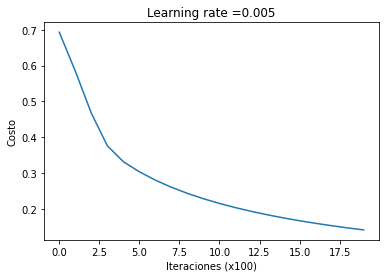

In [21]:
# Plot learning curve (with costs)
costs = np.squeeze(history['costs'])
plt.plot(costs)
plt.ylabel('Costo')
plt.xlabel('Iteraciones (x100)')
plt.title("Learning rate =" + str(history["learning_rate"]))
plt.show()